In [694]:
import pandas as pd
import numpy as np
import pandas_profiling

import seaborn as sns
pd.set_option('display.max_columns', 500) 
import matplotlib.pyplot as plt
#! pip install pandas-profiling

In [695]:
import d6tstack.convert_xls
from d6tstack.convert_xls import XLSSniffer
import glob
#
from d6tstack.utils import PrintLogger
import dask.dataframe as dd


In [696]:
#TN_2019_rmd = pd.read_excel('./data/2019 County Health Rankings Tennessee Data.xls', 'Ranked Measure Data', header=None)

In [697]:
#file_2019_rmd2_dropped.columns = file_2019_rmd2_dropped.iloc[0]
#file_2019_rmd2_dropped.head()

In [698]:
#file_2019_rmd2_dropped.iloc[0]

In [699]:
#selecting out the columns based on the string of the names of the columns
#file_2019_rmd_clean = file_2019_rmd.loc[:, ~file_2019_rmd.columns.str.startswith('Unnamed')]
#file_2019_rmd_clean.head()

In [700]:
# Finding out the sheet names by importing all sheets and using sheet_names
#TN_2019 = pd.ExcelFile('./data/2019 County Health Rankings Tennessee Data.xls')
#TN_2019.sheet_names

# Using d6tstack to check the consistancy between multiple xls files and heling in extracting desired sheet from all the xls files to merge into one

## Checking all state files contains the required sheet.
11 states were choosen represnting Southern USA. All counties data ranking was downloaded so I have 11 xls files, each containing multiple sheets. Before combining all of them, I want to know if all files have the same names of the sheets and contains the desired sheet such as 'Ranked Measure Data' and 'Additional Measure Data'.

In [701]:
cfg_fnames = list(glob.glob('data/Measure data southern states/*.xls'))
print(len(cfg_fnames))

11


so, all of the 11 files names were added to the file name list. Now I am going to check the consistancy between files using sniffer.

In [702]:
sniffer = XLSSniffer(cfg_fnames)

print('all files have same sheet count?', sniffer.all_same_count())
print('')
print('all files have same sheet names?', sniffer.all_same_names())
print('')
print('all files contain sheet?', sniffer.all_contain_sheetname('Ranked Measure Data'))
print('')
print('all files contain sheet?', sniffer.all_contain_sheetname('Additional Measure Data'))
print('')
print('detailed dataframe')
print('')
print(sniffer.df_xls_sheets.reset_index(drop=True))

all files have same sheet count? True

all files have same sheet names? True

all files contain sheet? True

all files contain sheet? True

detailed dataframe

                                         file_name sheets_count             sheets_idx                                       sheets_names
0          Georgia 2019 County Health Rankings.xls            7  [0, 1, 2, 3, 4, 5, 6]  [Introduction, Outcomes & Factors Rankings, Ou...
1         Arkansas 2019 County Health Rankings.xls            7  [0, 1, 2, 3, 4, 5, 6]  [Introduction, Outcomes & Factors Rankings, Ou...
2   South Carolina 2019 County Health Rankings.xls            7  [0, 1, 2, 3, 4, 5, 6]  [Introduction, Outcomes & Factors Rankings, Ou...
3          Florida 2019 County Health Rankings.xls            7  [0, 1, 2, 3, 4, 5, 6]  [Introduction, Outcomes & Factors Rankings, Ou...
4            Texas 2019 County Health Rankings.xls            7  [0, 1, 2, 3, 4, 5, 6]  [Introduction, Outcomes & Factors Rankings, Ou...
5         Vi

### It looks good that all the states files contains the sheets i need for my project.

In [703]:
#pd.read_excel(cfg_fnames[0]).head()

# Extracting Ranked Measure Data sheet from all the xls files and merging

In [704]:
# Testing if i can sucessfully load desired sheet from desired file. cfg_fnames will denote which file i want to use.
test_rmd = pd.read_excel(cfg_fnames[0], sheet_name='Ranked Measure Data', header=None)
#test.head()

In [705]:
Georgia = pd.read_excel(cfg_fnames[0], sheet_name='Ranked Measure Data', header = None)
Arkansas = pd.read_excel(cfg_fnames[1], sheet_name='Ranked Measure Data', header = None)
SouthCarolina = pd.read_excel(cfg_fnames[2], sheet_name='Ranked Measure Data', header = None)
Florida = pd.read_excel(cfg_fnames[3], sheet_name='Ranked Measure Data', header = None)
Texas = pd.read_excel(cfg_fnames[4], sheet_name='Ranked Measure Data', header = None)
Virginia = pd.read_excel(cfg_fnames[5], sheet_name='Ranked Measure Data', header = None)
Mississippi = pd.read_excel(cfg_fnames[6], sheet_name='Ranked Measure Data', header = None)
NorthCaroline = pd.read_excel(cfg_fnames[7], sheet_name='Ranked Measure Data', header = None)
Louisiana = pd.read_excel(cfg_fnames[8], sheet_name='Ranked Measure Data', header = None)
Tennessee = pd.read_excel(cfg_fnames[9], sheet_name='Ranked Measure Data', header = None)
Alabama = pd.read_excel(cfg_fnames[10], sheet_name='Ranked Measure Data', header = None)

In [706]:
Ranked_Measure_Data = pd.concat([Georgia, Arkansas, SouthCarolina, Florida, Texas, Virginia, Mississippi, NorthCaroline, Louisiana, Tennessee, Alabama])
Ranked_Measure_Data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161
0,NaN,NaN,NaN,Premature death,NaN,NaN,NaN,NaN,NaN,NaN,Poor or fair health,NaN,NaN,NaN,Poor physical health days,NaN,NaN,NaN,Poor mental health days,NaN,NaN,NaN,Low birthweight,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult smoking,NaN,NaN,NaN,Adult obesity,NaN,NaN,NaN,Food environment index,NaN,Physical inactivity,NaN,NaN,NaN,Access to exercise opportunities,NaN,Excessive drinking,NaN,NaN,NaN,Alcohol-impaired driving deaths,NaN,NaN,NaN,NaN,NaN,Sexually transmitted infections,NaN,NaN,Teen births,NaN,NaN,NaN,NaN,NaN,NaN,Uninsured,NaN,NaN,NaN,NaN,Primary care physicians,NaN,NaN,NaN,Dentists,NaN,NaN,NaN,Mental health providers,NaN,NaN,NaN,Preventable hospital stays,NaN,NaN,NaN,NaN,Mammography screening,NaN,NaN,NaN,NaN,Flu vaccinations,NaN,NaN,NaN,NaN,High school graduation,NaN,NaN,Some college,NaN,NaN,NaN,NaN,NaN,Unemployment,NaN,NaN,NaN,Children in poverty,NaN,NaN,NaN,NaN,NaN,NaN,Income inequality,NaN,NaN,NaN,Children in single-parent households,NaN,NaN,NaN,NaN,NaN,Social associations,NaN,NaN,Violent crime,NaN,NaN,Injury deaths,NaN,NaN,NaN,NaN,Air pollution - particulate matter,NaN,Drinking water violations,NaN,Severe housing problems,NaN,NaN,NaN,NaN,NaN,NaN,Driving alone to work,NaN,NaN,NaN,NaN,NaN,NaN,Long commute - driving alone,NaN,NaN,NaN,NaN
1,FIPS,State,County,Years of Potential Life Lost Rate,95% CI - Low,95% CI - High,Z-Score,YPLL Rate (Black),YPLL Rate (Hispanic),YPLL Rate (White),% Fair/Poor,95% CI - Low,95% CI - High,Z-Score,Physically Unhealthy Days,95% CI - Low,95% CI - High,Z-Score,Mentally Unhealthy Days,95% CI - Low,95% CI - High,Z-Score,Unreliable,% LBW,95% CI - Low,95% CI - High,Z-Score,% LBW (Black),% LBW (Hispanic),% LBW (White),% Smokers,95% CI - Low,95% CI - High,Z-Score,% Obese,95% CI - Low,95% CI - High,Z-Score,Food Environment Index,Z-Score,% Physically Inactive,95% CI - Low,95% CI - High,Z-Score,% With Access,Z-Score,% Excessive Drinking,95% CI - Low,95% CI - High,Z-Score,# Alcohol-Impaired Driving Deaths,# Driving Deaths,% Alcohol-Impaired,95% CI - Low,95% CI - High,Z-Score,# Chlamydia Cases,Chlamydia Rate,Z-Score,Teen Birth Rate,95% CI - Low,95% CI - High,Z-Score,Teen Birth Rate (Black),Teen Birth Rate (Hispanic),Teen Birth Rate (White),# Uninsured,% Uninsured,95% CI - Low,95% CI - High,Z-Score,# Primary Care Physicians,PCP Rate,PCP Ratio,Z-Score,# Dentists,Dentist Rate,Dentist Ratio,Z-Score,# Mental Health Providers,MHP Rate,MHP Ratio,Z-Score,Preventable Hosp. Rate,Z-Score,Preventable Hosp. Rate (Black),Preventable Hosp. Rate (Hispanic),Preventable Hosp. Rate (White),% Screened,Z-Score,% Screened (Black),% Screened (Hispanic),% Screened (White),% Vaccinated,Z-Score,% Vaccinated (Black),% Vaccinated (Hispanic),% Vaccinated (White),Cohort Size,Graduation Rate,Z-Score,# Some College,Population,% Some College,95% CI - Low,95% CI - High,Z-Score,# Unemployed,Labor Force,% Unemployed,Z-Score,% Children in Poverty,95% CI - Low,95% CI - High,Z-Score,% Children in Poverty (Black),% Children in Poverty (Hispanic),% Children in Poverty (White),80th Percentile Income,20th Percentile Income,Income Ratio,Z-Score,# Single-Parent Households,# Households,% Single-Parent Households,95% CI - Low,95% CI - High,Z-Score,# Associations,Association Rate,Z-Score,Annual Average Violent Crimes,Violent Crime Rate,Z-Score,# Injury Deaths,Injury Death Rate,95% CI - Low,95% CI - High,Z-Score,Average Daily PM2.5,Z-Score,Presence of violation,Z-Score,% Severe Housing Problems,95% CI - Low,95% CI - High,Severe Housing 

In [707]:
Ranked_Measure_Data_dropped = Ranked_Measure_Data.drop([4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 19, 20, 21, 22, 24, 25, 15, 26, 27, 28, 29, 31, \
                     32, 33, 35, 36, 37, 39, 41, 42, 43, 45, 47, 48, 49, 53, 54, 55, 58, 60, 61, 62, \
                    63, 64, 65, 68, 69, 70, 74, 78, 82, 84, 85, 86, 87, 89, 90, 91, 92, 94, \
                    95, 96, 97, 100, 102, 104, 105, 106, 110, 112, 113, 114, 115, 116, 117, 121, 122, 123, 124, 125, 126, \
                    127, 128, 129, 130, 133, 136, 137, 138, 140, 142, 144, 145, 146, 147, 148, 149, 150, 151, 152, \
                     153, 154, 155, 156, 157, 158, 159, 160, 161
                    ], axis=1)

In [708]:
#Ranked_Measure_Data_dropped.head()

In [709]:
#Assigning index 1 as column labels. Dropping index 0 and dropping index 1 after completion of assignement of column names.
RMD_2019_1 = Ranked_Measure_Data_dropped.rename(columns=Ranked_Measure_Data_dropped.iloc[1]).drop(Ranked_Measure_Data_dropped.index[0])
RMD_2019_2 = RMD_2019_1.drop([1], axis  = 0)

In [710]:
RMD_2019_2.reset_index(inplace=True)
RMD_2019_2.head()

,index,FIPS,State,County,Years of Potential Life Lost Rate,% Fair/Poor,Physically Unhealthy Days,Mentally Unhealthy Days,% LBW,% Smokers,% Obese,Food Environment Index,% Physically Inactive,% With Access,% Excessive Drinking,# Alcohol-Impaired Driving Deaths,# Driving Deaths,% Alcohol-Impaired,# Chlamydia Cases,Chlamydia Rate,Teen Birth Rate,# Uninsured,% Uninsured,# Primary Care Physicians,PCP Rate,PCP Ratio,# Dentists,Dentist Rate,Dentist Ratio,# Mental Health Providers,MHP Rate,MHP Ratio,Preventable Hosp. Rate,% Screened,% Vaccinated,Cohort Size,Graduation Rate,# Some College,% Some College,# Unemployed,Labor Force,% Unemployed,% Children in Poverty,80th Percentile Income,20th Percentile Income,Income Ratio,Annual Average Violent Crimes,Violent Crime Rate,# Injury Deaths,Injury Death Rate,Average Daily PM2.5,Presence of violation,% Severe Housing Problems
0,2,13000,Georgia,NaN,7718.31,18.8002,3.80603,3.75792,9.53273,17.8864,30.3,6,24.3,75.9692,15.0517,1540,6872,22.4098,62776,614.6,28.7665,1295994,14.8851,6778,65.7396,1521:1,5316,50.9714,1962:1,13271,127.246,786:1,4851,40,43,127482,80.6,1736701,62.5606,239786,5061413,4.73753,21.5,107344,21684,4.95038,39543.5,387.535,32240,63.161,10.9,NaN,17.7057
1,3,13001,Georgia,Appling,10750,20.8603,4.31562,4.16764,9.86651,20.2004,36.1,7.5,27.2,27.6486,14.6861,6,25,24,99,536.5,66.9782,2635,17.6089,8,43.4122,2304:1,3,16.1978,6174:1,7,37.7949,2646:1,7080,37,30,231,82.684,1675,38.7462,512,9261,5.52856,33.5,78394,15377,5.09813,70,379.198,74,80.1013,10.6,No,10.2056
2,4,13003,Georgia,Atkinson,10902.1,26.7664,4.86318,4.43994,7.60296,23.5527,32.1,7.3,28.2,0,14.4235,3,8,37.5,36,428.7,78.0177,1717,24.1729,NaN,NaN,NaN,1,11.9875,8342:1,NaN,NaN,NaN,7663,35,36,108,87.037,754,35.566,187,4160,4.49519,36.5,68298,16159,4.22662,NaN,NaN,44,105.958,10.4,No,15.8845
3,5,13005,Georgia,Bacon,11414.5,19.1576,4.3312,4.02076,9.45674,19.9992,33,7.8,28.9,61.0941,15.7571,4,17,23.5294,59,522.2,47.5454,1742,18.625,5,43.9676,2274:1,3,26.5041,3773:1,1,8.8347,11319:1,7038,36,32,137,84.6715,1258,42.1017,231,5091,4.53742,42.7,84407,15716,5.37077,NaN,NaN,50,88.5159,10.4,No,10.1266
4,6,13007,Georgia,Baker,NaN,18.5125,3.90393,3.78613,13.5514,18.2196,32.5,5,27.4,5.8244,13.819,6,10,60,13,408.8,36.4742,405,16.0651,NaN,NaN,NaN,0,0,3200:0,1,31.25,3200:1,7961,55,22,20,90,356,49.5132,77,1220,6.31148,40,79571,12956,6.14163,NaN,NaN,11,68.2128,10.8,No,11.6279


In [711]:
RMD_2019_2.columns = RMD_2019_2.columns.str.replace(' ', '_')
RMD_2019_2.columns = RMD_2019_2.columns.str.replace(' ', '_')
RMD_2019_2.columns = RMD_2019_2.columns.str.replace('/', '_')
RMD_2019_2.columns = RMD_2019_2.columns.str.replace('-', '_')
RMD_2019_2.columns = RMD_2019_2.columns.str.replace('%', 'pct')
RMD_2019_2.columns = RMD_2019_2.columns.str.replace('<', 'below')
RMD_2019_2.columns = RMD_2019_2.columns.str.replace('#', 'count')
RMD_2019_2.head()

,index,FIPS,State,County,Years_of_Potential_Life_Lost_Rate,pct_Fair_Poor,Physically_Unhealthy_Days,Mentally_Unhealthy_Days,pct_LBW,pct_Smokers,pct_Obese,Food_Environment_Index,pct_Physically_Inactive,pct_With_Access,pct_Excessive_Drinking,count_Alcohol_Impaired_Driving_Deaths,count_Driving_Deaths,pct_Alcohol_Impaired,count_Chlamydia_Cases,Chlamydia_Rate,Teen_Birth_Rate,count_Uninsured,pct_Uninsured,count_Primary_Care_Physicians,PCP_Rate,PCP_Ratio,count_Dentists,Dentist_Rate,Dentist_Ratio,count_Mental_Health_Providers,MHP_Rate,MHP_Ratio,Preventable_Hosp._Rate,pct_Screened,pct_Vaccinated,Cohort_Size,Graduation_Rate,count_Some_College,pct_Some_College,count_Unemployed,Labor_Force,pct_Unemployed,pct_Children_in_Poverty,80th_Percentile_Income,20th_Percentile_Income,Income_Ratio,Annual_Average_Violent_Crimes,Violent_Crime_Rate,count_Injury_Deaths,Injury_Death_Rate,Average_Daily_PM2.5,Presence_of_violation,pct_Severe_Housing_Problems
0,2,13000,Georgia,NaN,7718.31,18.8002,3.80603,3.75792,9.53273,17.8864,30.3,6,24.3,75.9692,15.0517,1540,6872,22.4098,62776,614.6,28.7665,1295994,14.8851,6778,65.7396,1521:1,5316,50.9714,1962:1,13271,127.246,786:1,4851,40,43,127482,80.6,1736701,62.5606,239786,5061413,4.73753,21.5,107344,21684,4.95038,39543.5,387.535,32240,63.161,10.9,NaN,17.7057
1,3,13001,Georgia,Appling,10750,20.8603,4.31562,4.16764,9.86651,20.2004,36.1,7.5,27.2,27.6486,14.6861,6,25,24,99,536.5,66.9782,2635,17.6089,8,43.4122,2304:1,3,16.1978,6174:1,7,37.7949,2646:1,7080,37,30,231,82.684,1675,38.7462,512,9261,5.52856,33.5,78394,15377,5.09813,70,379.198,74,80.1013,10.6,No,10.2056
2,4,13003,Georgia,Atkinson,10902.1,26.7664,4.86318,4.43994,7.60296,23.5527,32.1,7.3,28.2,0,14.4235,3,8,37.5,36,428.7,78.0177,1717,24.1729,NaN,NaN,NaN,1,11.9875,8342:1,NaN,NaN,NaN,7663,35,36,108,87.037,754,35.566,187,4160,4.49519,36.5,68298,16159,4.22662,NaN,NaN,44,105.958,10.4,No,15.8845
3,5,13005,Georgia,Bacon,11414.5,19.1576,4.3312,4.02076,9.45674,19.9992,33,7.8,28.9,61.0941,15.7571,4,17,23.5294,59,522.2,47.5454,1742,18.625,5,43.9676,2274:1,3,26.5041,3773:1,1,8.8347,11319:1,7038,36,32,137,84.6715,1258,42.1017,231,5091,4.53742,42.7,84407,15716,5.37077,NaN,NaN,50,88.5159,10.4,No,10.1266
4,6,13007,Georgia,Baker,NaN,18.5125,3.90393,3.78613,13.5514,18.2196,32.5,5,27.4,5.8244,13.819,6,10,60,13,408.8,36.4742,405,16.0651,NaN,NaN,NaN,0,0,3200:0,1,31.25,3200:1,7961,55,22,20,90,356,49.5132,77,1220,6.31148,40,79571,12956,6.14163,NaN,NaN,11,68.2128,10.8,No,11.6279


### Removing the row with average of each variables in a state (uniqueness in these rows is that these rows do not have county name, NaN)

In [712]:
RMD_2019_2 = RMD_2019_2[pd.notnull(RMD_2019_2['County'])]
RMD_2019_2.head()

,index,FIPS,State,County,Years_of_Potential_Life_Lost_Rate,pct_Fair_Poor,Physically_Unhealthy_Days,Mentally_Unhealthy_Days,pct_LBW,pct_Smokers,pct_Obese,Food_Environment_Index,pct_Physically_Inactive,pct_With_Access,pct_Excessive_Drinking,count_Alcohol_Impaired_Driving_Deaths,count_Driving_Deaths,pct_Alcohol_Impaired,count_Chlamydia_Cases,Chlamydia_Rate,Teen_Birth_Rate,count_Uninsured,pct_Uninsured,count_Primary_Care_Physicians,PCP_Rate,PCP_Ratio,count_Dentists,Dentist_Rate,Dentist_Ratio,count_Mental_Health_Providers,MHP_Rate,MHP_Ratio,Preventable_Hosp._Rate,pct_Screened,pct_Vaccinated,Cohort_Size,Graduation_Rate,count_Some_College,pct_Some_College,count_Unemployed,Labor_Force,pct_Unemployed,pct_Children_in_Poverty,80th_Percentile_Income,20th_Percentile_Income,Income_Ratio,Annual_Average_Violent_Crimes,Violent_Crime_Rate,count_Injury_Deaths,Injury_Death_Rate,Average_Daily_PM2.5,Presence_of_violation,pct_Severe_Housing_Problems
1,3,13001,Georgia,Appling,10750,20.8603,4.31562,4.16764,9.86651,20.2004,36.1,7.5,27.2,27.6486,14.6861,6,25,24,99,536.5,66.9782,2635,17.6089,8,43.4122,2304:1,3,16.1978,6174:1,7,37.7949,2646:1,7080,37,30,231,82.684,1675,38.7462,512,9261,5.52856,33.5,78394,15377,5.09813,70,379.198,74,80.1013,10.6,No,10.2056
2,4,13003,Georgia,Atkinson,10902.1,26.7664,4.86318,4.43994,7.60296,23.5527,32.1,7.3,28.2,0,14.4235,3,8,37.5,36,428.7,78.0177,1717,24.1729,NaN,NaN,NaN,1,11.9875,8342:1,NaN,NaN,NaN,7663,35,36,108,87.037,754,35.566,187,4160,4.49519,36.5,68298,16159,4.22662,NaN,NaN,44,105.958,10.4,No,15.8845
3,5,13005,Georgia,Bacon,11414.5,19.1576,4.3312,4.02076,9.45674,19.9992,33,7.8,28.9,61.0941,15.7571,4,17,23.5294,59,522.2,47.5454,1742,18.625,5,43.9676,2274:1,3,26.5041,3773:1,1,8.8347,11319:1,7038,36,32,137,84.6715,1258,42.1017,231,5091,4.53742,42.7,84407,15716,5.37077,NaN,NaN,50,88.5159,10.4,No,10.1266
4,6,13007,Georgia,Baker,NaN,18.5125,3.90393,3.78613,13.5514,18.2196,32.5,5,27.4,5.8244,13.819,6,10,60,13,408.8,36.4742,405,16.0651,NaN,NaN,NaN,0,0,3200:0,1,31.25,3200:1,7961,55,22,20,90,356,49.5132,77,1220,6.31148,40,79571,12956,6.14163,NaN,NaN,11,68.2128,10.8,No,11.6279
5,7,13009,Georgia,Baldwin,9659.22,23.5033,4.70273,4.25073,12.6496,24.1076,34.1,5.8,23.9,63.0074,13.9761,7,36,19.4444,289,635.7,17.8093,4975,15.0348,26,57.5935,1736:1,18,40.0837,2495:1,60,133.612,748:1,5451,40,40,295,88.8136,5245,52.3767,1059,17815,5.94443,32.5,82716,13434,6.15721,316,689.414,164,72.1015,11.4,Yes,20.025


In [713]:
RMD_2019 = RMD_2019_2.drop(["index"], axis =1)

In [714]:
RMD_2019.head()

,FIPS,State,County,Years_of_Potential_Life_Lost_Rate,pct_Fair_Poor,Physically_Unhealthy_Days,Mentally_Unhealthy_Days,pct_LBW,pct_Smokers,pct_Obese,Food_Environment_Index,pct_Physically_Inactive,pct_With_Access,pct_Excessive_Drinking,count_Alcohol_Impaired_Driving_Deaths,count_Driving_Deaths,pct_Alcohol_Impaired,count_Chlamydia_Cases,Chlamydia_Rate,Teen_Birth_Rate,count_Uninsured,pct_Uninsured,count_Primary_Care_Physicians,PCP_Rate,PCP_Ratio,count_Dentists,Dentist_Rate,Dentist_Ratio,count_Mental_Health_Providers,MHP_Rate,MHP_Ratio,Preventable_Hosp._Rate,pct_Screened,pct_Vaccinated,Cohort_Size,Graduation_Rate,count_Some_College,pct_Some_College,count_Unemployed,Labor_Force,pct_Unemployed,pct_Children_in_Poverty,80th_Percentile_Income,20th_Percentile_Income,Income_Ratio,Annual_Average_Violent_Crimes,Violent_Crime_Rate,count_Injury_Deaths,Injury_Death_Rate,Average_Daily_PM2.5,Presence_of_violation,pct_Severe_Housing_Problems
1,13001,Georgia,Appling,10750,20.8603,4.31562,4.16764,9.86651,20.2004,36.1,7.5,27.2,27.6486,14.6861,6,25,24,99,536.5,66.9782,2635,17.6089,8,43.4122,2304:1,3,16.1978,6174:1,7,37.7949,2646:1,7080,37,30,231,82.684,1675,38.7462,512,9261,5.52856,33.5,78394,15377,5.09813,70,379.198,74,80.1013,10.6,No,10.2056
2,13003,Georgia,Atkinson,10902.1,26.7664,4.86318,4.43994,7.60296,23.5527,32.1,7.3,28.2,0,14.4235,3,8,37.5,36,428.7,78.0177,1717,24.1729,NaN,NaN,NaN,1,11.9875,8342:1,NaN,NaN,NaN,7663,35,36,108,87.037,754,35.566,187,4160,4.49519,36.5,68298,16159,4.22662,NaN,NaN,44,105.958,10.4,No,15.8845
3,13005,Georgia,Bacon,11414.5,19.1576,4.3312,4.02076,9.45674,19.9992,33,7.8,28.9,61.0941,15.7571,4,17,23.5294,59,522.2,47.5454,1742,18.625,5,43.9676,2274:1,3,26.5041,3773:1,1,8.8347,11319:1,7038,36,32,137,84.6715,1258,42.1017,231,5091,4.53742,42.7,84407,15716,5.37077,NaN,NaN,50,88.5159,10.4,No,10.1266
4,13007,Georgia,Baker,NaN,18.5125,3.90393,3.78613,13.5514,18.2196,32.5,5,27.4,5.8244,13.819,6,10,60,13,408.8,36.4742,405,16.0651,NaN,NaN,NaN,0,0,3200:0,1,31.25,3200:1,7961,55,22,20,90,356,49.5132,77,1220,6.31148,40,79571,12956,6.14163,NaN,NaN,11,68.2128,10.8,No,11.6279
5,13009,Georgia,Baldwin,9659.22,23.5033,4.70273,4.25073,12.6496,24.1076,34.1,5.8,23.9,63.0074,13.9761,7,36,19.4444,289,635.7,17.8093,4975,15.0348,26,57.5935,1736:1,18,40.0837,2495:1,60,133.612,748:1,5451,40,40,295,88.8136,5245,52.3767,1059,17815,5.94443,32.5,82716,13434,6.15721,316,689.414,164,72.1015,11.4,Yes,20.025


In [715]:
#RMD_2019.isnull().sum()

Filling NaN with the mean of the variable. Some variable has Yes and Nos and few have ratios. We need to clean up a bit before dealing with those columns.

In [716]:
# we use .str to replace and then convert to float
#RMD_2019['PCP_Ratio'] = RMD_2019.PCP_Ratio.str.replace(':*', '').astype(float)
#RMD_2019['Dentist_Ratio'] = RMD_2019.Dentist_Ratio.str.replace(':*', '').astype(float)
#RMD_2019['MHP_Ratio'] = RMD_2019.MHP_Ratio.str.replace(':*', '').astype(float)

In [717]:
RMD_2019.fillna(RMD_2019.mean(), inplace=True)

In [719]:
#RMD_2019.info()

In [648]:
#print(RMD_2019.MHP_Ratio)

In [649]:
#RMD_2019['Presence_of_violation'].str.contains('Yes').astype(int).head()

In [720]:
RMD_2019['Presence_of_violation'].fillna('Unk', inplace=True)

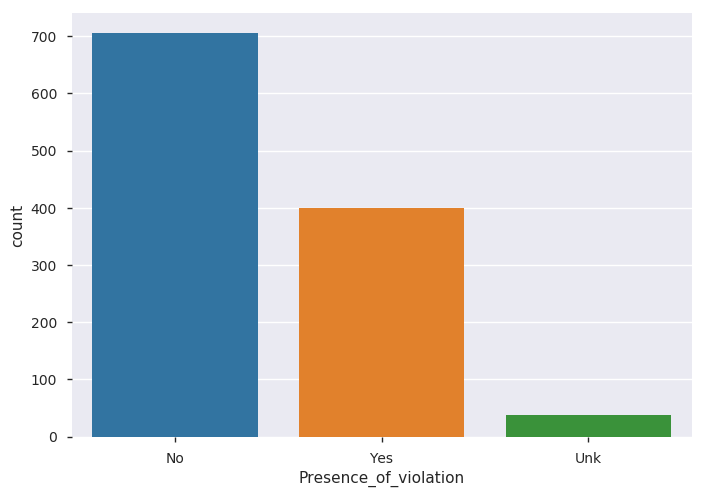

In [722]:
sns.countplot(RMD_2019['Presence_of_violation'],label="Count");

In [652]:
#RMD_2019.isnull().sum()

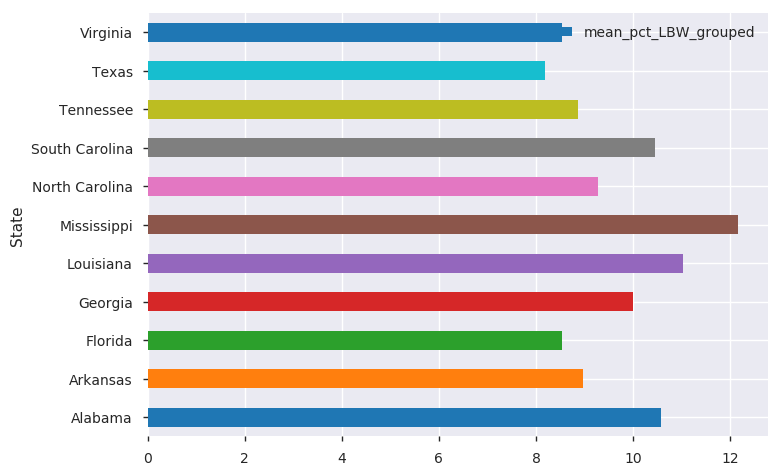

In [724]:
df_grouped = RMD_2019.groupby(
        by=['State']
    )['pct_LBW'].mean().reset_index(name='mean_pct_LBW_grouped')
df_grouped.plot(x = 'State', y = 'mean_pct_LBW_grouped', kind  = 'barh');

# Additional Measure Data Files loading and cleaning up

In [725]:
test_amd = pd.read_excel(cfg_fnames[0], sheet_name= 'Additional Measure Data', header=None)
#test_amd.head()

In [726]:
Georgia_amd = pd.read_excel(cfg_fnames[0], sheet_name='Additional Measure Data', header = None)
Arkansas_amd = pd.read_excel(cfg_fnames[1], sheet_name='Additional Measure Data', header = None)
SouthCarolina_amd = pd.read_excel(cfg_fnames[2], sheet_name='Additional Measure Data', header = None)
Florida_amd = pd.read_excel(cfg_fnames[3], sheet_name='Additional Measure Data', header = None)
Texas_amd = pd.read_excel(cfg_fnames[4], sheet_name='Additional Measure Data', header = None)
Virginia_amd = pd.read_excel(cfg_fnames[5], sheet_name='Additional Measure Data', header = None)
Mississippi_amd = pd.read_excel(cfg_fnames[6], sheet_name='Additional Measure Data', header = None)
NorthCaroline_amd = pd.read_excel(cfg_fnames[7], sheet_name='Additional Measure Data', header = None)
Louisiana_amd = pd.read_excel(cfg_fnames[8], sheet_name='Additional Measure Data', header = None)
Tennessee_amd = pd.read_excel(cfg_fnames[9], sheet_name='Additional Measure Data', header = None)
Alabama_amd = pd.read_excel(cfg_fnames[10], sheet_name='Additional Measure Data', header = None)

In [727]:
Additional_Measure_Data = pd.concat([Georgia_amd, Arkansas_amd, SouthCarolina_amd, Florida_amd, Texas_amd, Virginia_amd, Mississippi_amd, NorthCaroline_amd, Louisiana_amd, Tennessee_amd, Alabama_amd])
Additional_Measure_Data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110
0,NaN,NaN,NaN,Life expectancy,NaN,NaN,NaN,NaN,NaN,Premature age-adjusted mortality,NaN,NaN,NaN,NaN,NaN,NaN,Child mortality,NaN,NaN,NaN,NaN,NaN,NaN,Infant mortality,NaN,NaN,NaN,NaN,NaN,NaN,Frequent physical distress,NaN,NaN,Frequent mental distress,NaN,NaN,Diabetes prevalence,NaN,NaN,HIV prevalence,NaN,Food insecurity,NaN,Limited access to healthy foods,NaN,Drug overdose deaths,NaN,Motor vehicle crash deaths,NaN,NaN,NaN,Insufficient sleep,NaN,NaN,Uninsured adults,NaN,NaN,NaN,Uninsured children,NaN,NaN,NaN,Other primary care providers,NaN,Disconnected youth,Median household income,NaN,NaN,NaN,NaN,NaN,Children eligible for free or reduced price lunch,Residential segregation - black/white,Residential segregation - non-white/white,Homicides,NaN,NaN,Firearm fatalities,NaN,NaN,NaN,Homeownership,NaN,NaN,NaN,Severe housing cost burden,NaN,NaN,NaN,Demographics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,FIPS,State,County,Life Expectancy,95% CI - Low,95% CI - High,Life Expectancy (Black),Life Expectancy (Hispanic),Life Expectancy (White),# Deaths,Age-Adjusted Mortality,95% CI - Low,95% CI - High,Age-Adjusted Mortality (Black),Age-Adjusted Mortality (Hispanic),Age-Adjusted Mortality (White),# Deaths,Child Mortality Rate,95% CI - Low,95% CI - High,Child Mortality Rate (Black),Child Mortality Rate (Hispanic),Child Mortality Rate (White),# Deaths,Infant Mortality Rate,95% CI - Low,95% CI - High,Infant Mortality Rate (Black),Infant Mortality Rate (Hispanic),Infant Mortality Rate (White),% Frequent Physical Distress,95% CI - Low,95% CI - High,% Frequent Mental Distress,95% CI - Low,95% CI - High,% Diabetic,95% CI - Low,95% CI - High,# HIV Cases,HIV Prevalence Rate,# Food Insecure,% Food Insecure,# Limited Access,% Limited Access,# Drug Overdose Deaths,Drug Overdose Mortality Rate,# Motor Vehicle Deaths,MV Mortality Rate,95% CI - Low,95% CI - High,% Insufficient Sleep,95% CI - Low,95% CI - High,# Uninsured,% Uninsured,95% CI - Low,95% CI - High,# Uninsured,% Uninsured,95% CI - Low,95% CI - High,Other PCP Rate,Other PCP Ratio,% Disconnected Youth,Household Income,95% CI - Low,95% CI - High,Household income (Black),Household income (Hispanic),Household income (White),% Free or Reduced Lunch,Segregation index,Segregation Index,Homicide Rate,95% CI - Low,95% CI - High,# Firearm Fatalities,Firearm Fatalities Rate,95% CI - Low,95% CI - High,# Homeowners,% Homeowners,95% CI - Low,95% CI - High,# Households with Severe Cost Burden,% Severe Housing Cost Burden,95% CI - Low,95% CI - High,Population,% < 18,% 65 and over,# African American,% African American,# American Indian/Alaskan Native,% American Indian/Alaskan Native,# Asian,% Asian,# Native Hawaiian/Other Pacific Islander,% Native Hawaiian/Other Pacific Islander,# Hispanic,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,95% CI - Low,95% CI - High,% Female,# Rural,% Rural
2,13000,Georgia,NaN,77.6867,77.6281,77.7453,NaN,NaN,NaN,129112,381.5,379.4,383.6,NaN,NaN,NaN,6070,60.5565,59,62.1,NaN,NaN,NaN,6522,7.10518,6.9,7.3,NaN,NaN,NaN,11.9518,10.8529,13.1455,12.5079,11.2697,13.861,11.6,NaN,NaN,49463,588,1561360,15.1,876198,9.04449,4233,13.6749,9430,13.3231,13.1,13.6,36.2584,34.5389,38.0138,1138593,18.2479,17.8905,18.6054,172912,6.66598,6.18938,7.14257,95.2981,1049:1,8.57925,56117,55447.4,56786.6,NaN,NaN,NaN,61.9598,54.0101,47.8942,6.9,6.7,7.1,7292,14.3,14,14.6,2306772,62.9732,62.5774,63.3689,525019,14.8987,14.7272,15.0702,10429379,24.1117,13.4985,3267577,31.3305,53646,0.514374,440104,4.21985,12198,0.116958,1005959,9.64544,5507334,52.806,276378,2.89577,2.82942,2.96212,51.3345,24

In [728]:
Additional_Measure_Data_dropped = Additional_Measure_Data.drop([4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 25, 26, 27, 28, 29, 31, \
                     32, 34, 35, 37, 38, 39, 41, 49, 50, 52, 53, 56, 57, 60, 61, 62, \
                    63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 83, 84, 85, 86, 87, 88, \
                                        104, 105, 106, 107, 108, 109, 110
                    ], axis=1)

In [729]:
#Assignement of column names.
Additional_Measure_Data_dropped.columns = ['FIPS', 'State', 'County','Life Expectancy','Age-Adjusted Mortality','Child Mortality Rate',
                               'Count Infant Deaths','Infant Mortality Rate', '% Frequent Physical Distress', 
                               '% Frequent Mental Distress', '% Diabetic','HIV Prevalence Rate', '% Food Insecure', 
                               '# Limited Access to healthy foods', '% Limited Access to healthy foods', 
                               '# Drug Overdose Deaths', 'Drug Overdose Mortality Rate', '# Motor Vehicle Deaths',
                               'MV Mortality Rate', '% Insufficient Sleep','# Adult Uninsured', '% Adult Uninsured',
                               '# Child Uninsured', '% Child Uninsured', 'Household Income', '# Homeowners','% Homeowners', 
                               'Population', '% < 18','% 65 and over', '# African American', '% African American',
                               '# American Indian/Alaskan Native', '% American Indian/Alaskan Native', '# Asian',
                               '% Asian', '# Native Hawaiian/Other Pacific Islander', '% Native Hawaiian/Other Pacific Islander', 
                               '# Hispanic','% Hispanic', '# Non-Hispanic White', '% Non-Hispanic White']

In [730]:
Additional_Measure_Data_dropped.columns = Additional_Measure_Data_dropped.columns.str.replace(' ', '_')
Additional_Measure_Data_dropped.columns = Additional_Measure_Data_dropped.columns.str.replace('/', '_')
Additional_Measure_Data_dropped.columns = Additional_Measure_Data_dropped.columns.str.replace('-', '_')
Additional_Measure_Data_dropped.columns = Additional_Measure_Data_dropped.columns.str.replace('%', 'pct')
Additional_Measure_Data_dropped.columns = Additional_Measure_Data_dropped.columns.str.replace('<', 'below')
Additional_Measure_Data_dropped.columns = Additional_Measure_Data_dropped.columns.str.replace('#', 'count')

In [731]:
#Dropping index 0 and dropping index 0 and 1
Additional_Measure_Data_dropped = Additional_Measure_Data_dropped.drop([0], axis  = 0)
Additional_Measure_Data_dropped = Additional_Measure_Data_dropped.drop([1], axis  = 0)
#Additional_Measure_Data_dropped.head()

In [732]:
Additional_Measure_Data_dropped.reset_index(inplace=True)
Additional_Measure_Data_dropped.head()

,index,FIPS,State,County,Life_Expectancy,Age_Adjusted_Mortality,Child_Mortality_Rate,Count_Infant_Deaths,Infant_Mortality_Rate,pct_Frequent_Physical_Distress,pct_Frequent_Mental_Distress,pct_Diabetic,HIV_Prevalence_Rate,pct_Food_Insecure,count_Limited_Access_to_healthy_foods,pct_Limited_Access_to_healthy_foods,count_Drug_Overdose_Deaths,Drug_Overdose_Mortality_Rate,count_Motor_Vehicle_Deaths,MV_Mortality_Rate,pct_Insufficient_Sleep,count_Adult_Uninsured,pct_Adult_Uninsured,count_Child_Uninsured,pct_Child_Uninsured,Household_Income,count_Homeowners,pct_Homeowners,Population,pct_below_18,pct_65_and_over,count_African_American,pct_African_American,count_American_Indian_Alaskan_Native,pct_American_Indian_Alaskan_Native,count_Asian,pct_Asian,count_Native_Hawaiian_Other_Pacific_Islander,pct_Native_Hawaiian_Other_Pacific_Islander,count_Hispanic,pct_Hispanic,count_Non_Hispanic_White,pct_Non_Hispanic_White
0,2,13000,Georgia,NaN,77.6867,381.5,60.5565,6522,7.10518,11.9518,12.5079,11.6,588,15.1,876198,9.04449,4233,13.6749,9430,13.3231,36.2584,1138593,18.2479,172912,6.66598,56117,2306772,62.9732,10429379,24.1117,13.4985,3267577,31.3305,53646,0.514374,440104,4.21985,12198,0.116958,1005959,9.64544,5507334,52.806
1,3,13001,Georgia,Appling,74.5535,536.4,59.437,NaN,NaN,13.5132,13.6316,12.9,172,14.3,1235.13,6.77304,NaN,NaN,30,23.225,36.0408,2281,21.7881,384,8.10298,40862,4816,71.8591,18521,24.7935,17.2669,3444,18.5951,107,0.577723,146,0.788294,38,0.205173,1900,10.2586,12789,69.0513
2,4,13003,Georgia,Atkinson,73.4621,565.4,NaN,NaN,NaN,15.7466,14.9735,12.8,240.8,12.8,1027.37,12.2671,NaN,NaN,21,36.0682,38.392,1491,30.6223,243,10.3141,34821,2100,74.0741,8342,27.3076,14.2412,1343,16.0993,125,1.49844,76,0.911053,89,1.06689,2070,24.8142,4739,56.8089
3,5,13005,Georgia,Bacon,72.5771,608.3,NaN,NaN,NaN,13.2138,13.1277,12.4,468.6,13.2,607.656,5.47635,NaN,NaN,25,31.6905,36.4342,1503,23.1089,259,8.60751,38417,2821,70.7195,11319,25.8945,15.4342,1816,16.0438,40,0.353388,68,0.60076,19,0.167859,1008,8.90538,8249,72.8775
4,6,13007,Georgia,Baker,76.2262,512.5,NaN,NaN,NaN,11.8411,12.035,16.5,296.9,16.5,1054.16,30.5464,NaN,NaN,NaN,NaN,37.5605,363,18.9655,45,7.06436,37286,916,69.3414,3200,19.8438,21.9375,1427,44.5938,15,0.46875,35,1.09375,2,0.0625,182,5.6875,1514,47.3125


In [734]:
Additional_Measure_Data_dropped = Additional_Measure_Data_dropped.drop(["index"], axis =1)
Additional_Measure_Data_dropped.head()

,FIPS,State,County,Life_Expectancy,Age_Adjusted_Mortality,Child_Mortality_Rate,Count_Infant_Deaths,Infant_Mortality_Rate,pct_Frequent_Physical_Distress,pct_Frequent_Mental_Distress,pct_Diabetic,HIV_Prevalence_Rate,pct_Food_Insecure,count_Limited_Access_to_healthy_foods,pct_Limited_Access_to_healthy_foods,count_Drug_Overdose_Deaths,Drug_Overdose_Mortality_Rate,count_Motor_Vehicle_Deaths,MV_Mortality_Rate,pct_Insufficient_Sleep,count_Adult_Uninsured,pct_Adult_Uninsured,count_Child_Uninsured,pct_Child_Uninsured,Household_Income,count_Homeowners,pct_Homeowners,Population,pct_below_18,pct_65_and_over,count_African_American,pct_African_American,count_American_Indian_Alaskan_Native,pct_American_Indian_Alaskan_Native,count_Asian,pct_Asian,count_Native_Hawaiian_Other_Pacific_Islander,pct_Native_Hawaiian_Other_Pacific_Islander,count_Hispanic,pct_Hispanic,count_Non_Hispanic_White,pct_Non_Hispanic_White
0,13000,Georgia,NaN,77.6867,381.5,60.5565,6522,7.10518,11.9518,12.5079,11.6,588,15.1,876198,9.04449,4233,13.6749,9430,13.3231,36.2584,1138593,18.2479,172912,6.66598,56117,2306772,62.9732,10429379,24.1117,13.4985,3267577,31.3305,53646,0.514374,440104,4.21985,12198,0.116958,1005959,9.64544,5507334,52.806
1,13001,Georgia,Appling,74.5535,536.4,59.437,NaN,NaN,13.5132,13.6316,12.9,172,14.3,1235.13,6.77304,NaN,NaN,30,23.225,36.0408,2281,21.7881,384,8.10298,40862,4816,71.8591,18521,24.7935,17.2669,3444,18.5951,107,0.577723,146,0.788294,38,0.205173,1900,10.2586,12789,69.0513
2,13003,Georgia,Atkinson,73.4621,565.4,NaN,NaN,NaN,15.7466,14.9735,12.8,240.8,12.8,1027.37,12.2671,NaN,NaN,21,36.0682,38.392,1491,30.6223,243,10.3141,34821,2100,74.0741,8342,27.3076,14.2412,1343,16.0993,125,1.49844,76,0.911053,89,1.06689,2070,24.8142,4739,56.8089
3,13005,Georgia,Bacon,72.5771,608.3,NaN,NaN,NaN,13.2138,13.1277,12.4,468.6,13.2,607.656,5.47635,NaN,NaN,25,31.6905,36.4342,1503,23.1089,259,8.60751,38417,2821,70.7195,11319,25.8945,15.4342,1816,16.0438,40,0.353388,68,0.60076,19,0.167859,1008,8.90538,8249,72.8775
4,13007,Georgia,Baker,76.2262,512.5,NaN,NaN,NaN,11.8411,12.035,16.5,296.9,16.5,1054.16,30.5464,NaN,NaN,NaN,NaN,37.5605,363,18.9655,45,7.06436,37286,916,69.3414,3200,19.8438,21.9375,1427,44.5938,15,0.46875,35,1.09375,2,0.0625,182,5.6875,1514,47.3125


In [735]:
# Removing the state mean rows from the data using unique 'NaN' in County column
AMD_2019 = Additional_Measure_Data_dropped[pd.notnull(Additional_Measure_Data_dropped['County'])]
AMD_2019.head()

,FIPS,State,County,Life_Expectancy,Age_Adjusted_Mortality,Child_Mortality_Rate,Count_Infant_Deaths,Infant_Mortality_Rate,pct_Frequent_Physical_Distress,pct_Frequent_Mental_Distress,pct_Diabetic,HIV_Prevalence_Rate,pct_Food_Insecure,count_Limited_Access_to_healthy_foods,pct_Limited_Access_to_healthy_foods,count_Drug_Overdose_Deaths,Drug_Overdose_Mortality_Rate,count_Motor_Vehicle_Deaths,MV_Mortality_Rate,pct_Insufficient_Sleep,count_Adult_Uninsured,pct_Adult_Uninsured,count_Child_Uninsured,pct_Child_Uninsured,Household_Income,count_Homeowners,pct_Homeowners,Population,pct_below_18,pct_65_and_over,count_African_American,pct_African_American,count_American_Indian_Alaskan_Native,pct_American_Indian_Alaskan_Native,count_Asian,pct_Asian,count_Native_Hawaiian_Other_Pacific_Islander,pct_Native_Hawaiian_Other_Pacific_Islander,count_Hispanic,pct_Hispanic,count_Non_Hispanic_White,pct_Non_Hispanic_White
1,13001,Georgia,Appling,74.5535,536.4,59.437,NaN,NaN,13.5132,13.6316,12.9,172,14.3,1235.13,6.77304,NaN,NaN,30,23.225,36.0408,2281,21.7881,384,8.10298,40862,4816,71.8591,18521,24.7935,17.2669,3444,18.5951,107,0.577723,146,0.788294,38,0.205173,1900,10.2586,12789,69.0513
2,13003,Georgia,Atkinson,73.4621,565.4,NaN,NaN,NaN,15.7466,14.9735,12.8,240.8,12.8,1027.37,12.2671,NaN,NaN,21,36.0682,38.392,1491,30.6223,243,10.3141,34821,2100,74.0741,8342,27.3076,14.2412,1343,16.0993,125,1.49844,76,0.911053,89,1.06689,2070,24.8142,4739,56.8089
3,13005,Georgia,Bacon,72.5771,608.3,NaN,NaN,NaN,13.2138,13.1277,12.4,468.6,13.2,607.656,5.47635,NaN,NaN,25,31.6905,36.4342,1503,23.1089,259,8.60751,38417,2821,70.7195,11319,25.8945,15.4342,1816,16.0438,40,0.353388,68,0.60076,19,0.167859,1008,8.90538,8249,72.8775
4,13007,Georgia,Baker,76.2262,512.5,NaN,NaN,NaN,11.8411,12.035,16.5,296.9,16.5,1054.16,30.5464,NaN,NaN,NaN,NaN,37.5605,363,18.9655,45,7.06436,37286,916,69.3414,3200,19.8438,21.9375,1427,44.5938,15,0.46875,35,1.09375,2,0.0625,182,5.6875,1514,47.3125
5,13009,Georgia,Baldwin,75.2442,474,97.2373,32,9.98752,14.9511,14.3176,12.4,319.9,22.6,4261.03,9.31985,NaN,NaN,50,15.7114,38.6183,4518,18.2974,505,5.70428,40358,9004,55.1378,44906,19.1756,15.5948,18950,42.1993,155,0.345165,772,1.71915,35,0.0779406,1024,2.28032,23519,52.3738


In [736]:
#AMD_2019.isnull().sum()

In [737]:
AMD_2019.fillna(AMD_2019.mean(), inplace=True)

In [665]:
#Checked any duplicated entry in dataframes
#duplicated = cancer[cancer.duplicated()]
#duplicated = AMD_2019[AMD_2019.duplicated()]
#duplicated = RMD_2019[RMD_2019.duplicated()]
#duplicated

In [666]:
# There are county names common in other state too. So i checked and found there are many county names common 
#such as 'Lee' (repeated 9 times). So I crossed checked if it is not duplicated and found that it is unique in each state. 

#cancer.County.value_counts()

In [667]:
#cancer[cancer['County'].str.match('Lee')]

# Rate of new cancers and Cancer death rate data
https://gis.cdc.gov/Cancer/USCS/DataViz.html

In [832]:
cfg_fnames_deaths = list(glob.glob('data/Cancer data southern states/*deaths.csv'))
print(len(cfg_fnames_deaths))

11


In [833]:
deaths = pd.concat([(pd.read_csv(cfg_fnames_deaths[0])),
                   (pd.read_csv(cfg_fnames_deaths[1])),
                   (pd.read_csv(cfg_fnames_deaths[2])),
                   (pd.read_csv(cfg_fnames_deaths[3])),
                   (pd.read_csv(cfg_fnames_deaths[4])),
                   (pd.read_csv(cfg_fnames_deaths[5])),
                   (pd.read_csv(cfg_fnames_deaths[6])),
                   (pd.read_csv(cfg_fnames_deaths[7])),
                   (pd.read_csv(cfg_fnames_deaths[8])),
                   (pd.read_csv(cfg_fnames_deaths[9])),
                   (pd.read_csv(cfg_fnames_deaths[10]))
                  ])
deaths.shape

(1142, 8)

In [834]:
cfg_fnames_newcases = list(glob.glob('data/Cancer data southern states/*cancers.csv'))
print(len(cfg_fnames_newcases))

11


In [835]:
newcases = pd.concat([(pd.read_csv(cfg_fnames_newcases[0])),
                   (pd.read_csv(cfg_fnames_newcases[1])),
                   (pd.read_csv(cfg_fnames_newcases[2])),
                   (pd.read_csv(cfg_fnames_newcases[3])),
                   (pd.read_csv(cfg_fnames_newcases[4])),
                   (pd.read_csv(cfg_fnames_newcases[5])),
                   (pd.read_csv(cfg_fnames_newcases[6])),
                   (pd.read_csv(cfg_fnames_newcases[7])),
                   (pd.read_csv(cfg_fnames_newcases[8])),
                   (pd.read_csv(cfg_fnames_newcases[9])),
                   (pd.read_csv(cfg_fnames_newcases[10]))
                  ])
newcases.shape

(1142, 8)

In [836]:
#newcases.head()

In [837]:
#newcases.info()

In [838]:
#newcases.AgeAdjustedRate.unique()
#Data has 'Data Supressed' which is can be converetd as NaN or any number below 16. I am using 15.

In [839]:
newcases["Cases_AgeAdj_Rate"] = pd.to_numeric(newcases.AgeAdjustedRate, errors='coerce')
newcases["CaseCount"] = pd.to_numeric(newcases.CaseCount, errors='coerce')
newcases["Population"] = pd.to_numeric(newcases.Population, errors='coerce')
newcases.head()

,Area,County,CancerType,Year,Sex,AgeAdjustedRate,CaseCount,Population,Cases_AgeAdj_Rate
0,Mississippi,Issaquena County,All Types of Cancer,2011-2015,Male and Female,277.6,25.0,6932,277.6
1,Mississippi,George County,All Types of Cancer,2011-2015,Male and Female,384.2,486.0,115705,384.2
2,Mississippi,Kemper County,All Types of Cancer,2011-2015,Male and Female,398.6,261.0,50999,398.6
3,Mississippi,Smith County,All Types of Cancer,2011-2015,Male and Female,395.5,406.0,81304,395.5
4,Mississippi,Choctaw County,All Types of Cancer,2011-2015,Male and Female,387.6,224.0,41763,387.6


In [840]:
newcases.County = newcases.County.str.replace('County', '')

In [841]:
newcases = newcases.drop(['CancerType', 'Year', 'Sex',
       'Population', 'AgeAdjustedRate'], axis=1)

In [842]:
deaths["Deaths_AgeAdj_Rate"] = pd.to_numeric(deaths.AgeAdjustedRate, errors='coerce')
deaths["DeathCount"] = pd.to_numeric(deaths.DeathCount, errors='coerce')
deaths["Population"] = pd.to_numeric(deaths.Population, errors='coerce')
#deaths.head()

In [843]:
deaths.County = deaths.County.str.replace('County', '')
#deaths.head()

In [844]:
deaths = deaths.drop(['CancerType', 'Year', 'Sex', 'AgeAdjustedRate'], axis=1)
#deaths.head()

In [845]:
print('Total Number of Cancer Deaths in last 5 years (2011-2015) in 11 selected South States is:', deaths.DeathCount.sum())

Total Number of Cancer Deaths in last 5 years (2011-2015) in 11 selected South States is: 936145.0


In [846]:
print('Total Number of New cases of Cancer in last 5 years (2011-2015) in 11 selected South States is:', newcases.CaseCount.sum())

Total Number of New cases of Cancer in last 5 years (2011-2015) in 11 selected South States is: 2491360.0


In [988]:
cancer = pd.merge(newcases, deaths)
cancer.head()

,Area,County,CaseCount,Cases_AgeAdj_Rate,DeathCount,Population,Deaths_AgeAdj_Rate
0,Mississippi,Issaquena,25.0,277.6,NaN,6932,NaN
1,Mississippi,George,486.0,384.2,256.0,115705,213.3
2,Mississippi,Kemper,261.0,398.6,120.0,50999,185.5
3,Mississippi,Smith,406.0,395.5,195.0,81304,184.9
4,Mississippi,Choctaw,224.0,387.6,78.0,41763,133.4


In [989]:
cancer.columns = ['State', 'County', 'CaseCount', 'Cases_AgeAdj_Rate', 'DeathCount',
       'Population', 'Deaths_AgeAdj_Rate']

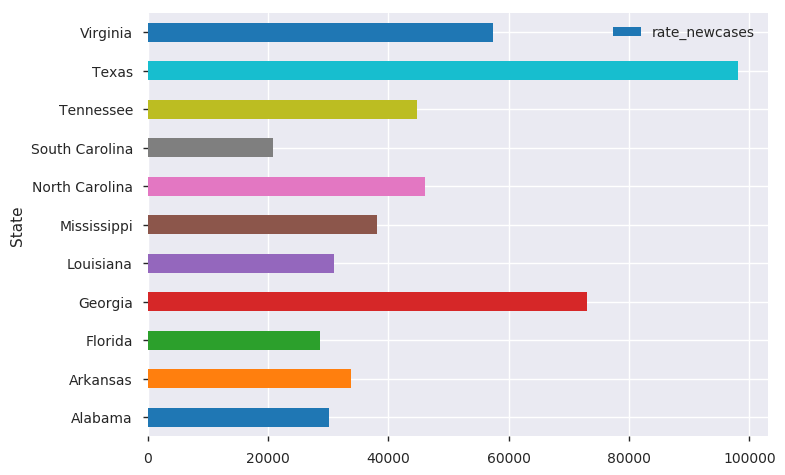

In [990]:
cancer_grouped = cancer.groupby(
        by=['State']
    )['Cases_AgeAdj_Rate'].sum().reset_index(name='rate_newcases')
cancer_grouped.plot(x = 'State', y = 'rate_newcases', kind  = 'barh');

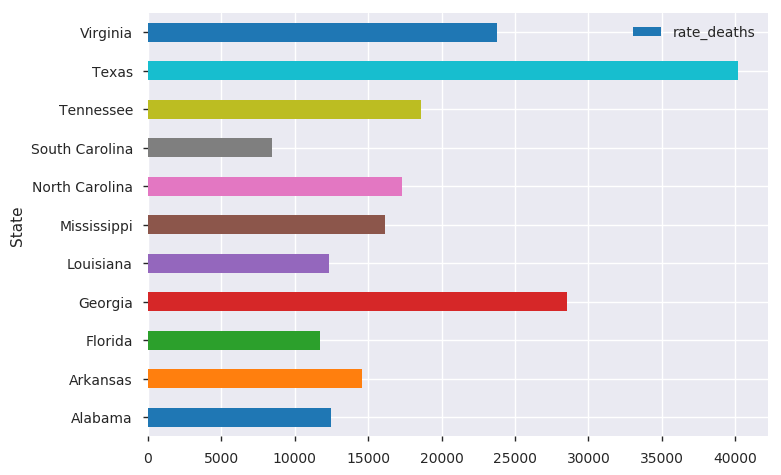

In [991]:
cancer_grouped1 = cancer.groupby(
        by=['State']
    )['Deaths_AgeAdj_Rate'].sum().reset_index(name='rate_deaths')
cancer_grouped1.plot(x = 'State', y = 'rate_deaths', kind  = 'barh');

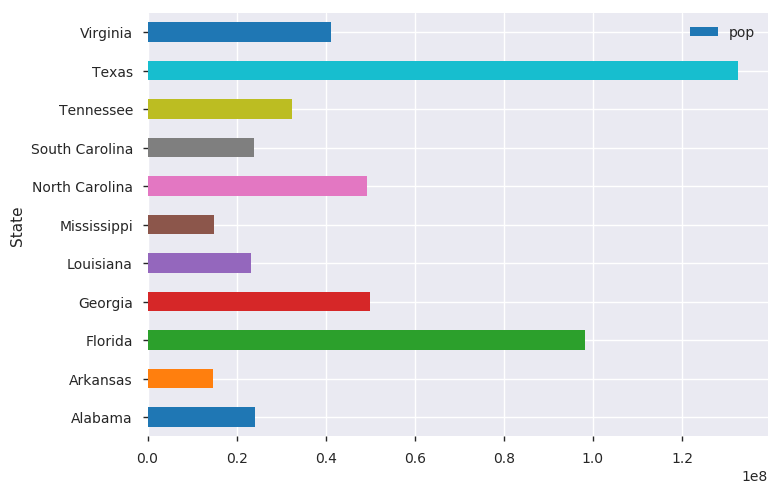

In [992]:
cancer_grouped2 = cancer.groupby(
        by=['State']
    )['Population'].sum().reset_index(name='pop')
cancer_grouped2.plot(x = 'State', y = 'pop', kind  = 'barh');

In [993]:
cancer.Population.describe()

count    1.142000e+03
mean     4.418066e+05
std      1.190241e+06
min      4.810000e+02
25%      6.999100e+04
50%      1.353950e+05
75%      3.393495e+05
max      2.176108e+07
Name: Population, dtype: float64

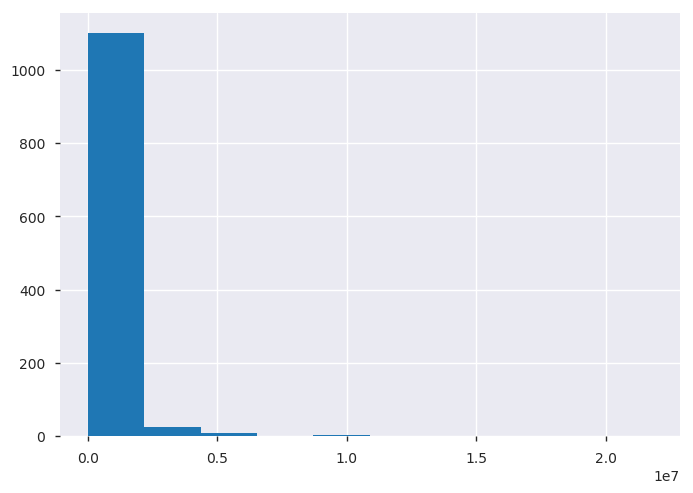

In [994]:
cancer.Population.hist()

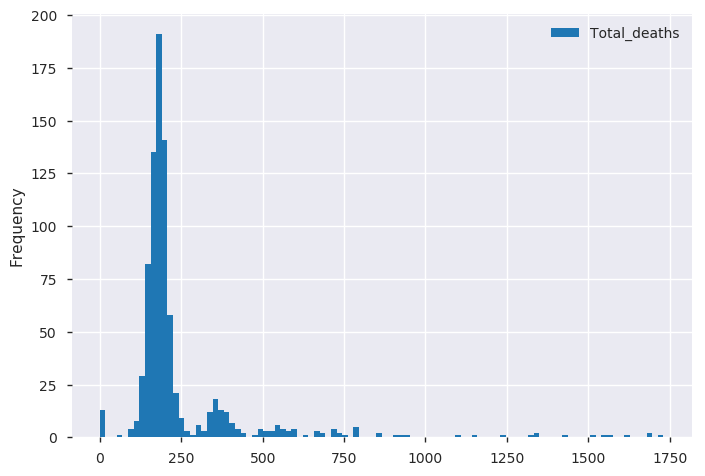

In [855]:
cancer_grouped2 = cancer.groupby(
        by=['County']
    )['Deaths_AgeAdj_Rate'].sum().reset_index(name='Total_deaths')
cancer_grouped2.plot(x = 'County', y = 'Total_deaths', bins= 100, kind  = 'hist');

# Using Pandas Profiling to explore the data quickly

In [856]:
profile_cancer = pandas_profiling.ProfileReport(cancer)
profile_cancer.to_file(outputfile="output.html");

In [857]:
profile_AMD = pandas_profiling.ProfileReport(AMD_2019)
profile_AMD.to_file(outputfile="output_AMD.html");

In [858]:
profile_RMD = pandas_profiling.ProfileReport(RMD_2019)
profile_RMD.to_file(outputfile="output_RMD.html");

/Users/user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


In [996]:
merged = pd.merge(AMD_2019, RMD_2019, on = ['FIPS'], how = 'left')
merged.shape

(1142, 93)

In [997]:
merged.head()

,FIPS,State_x,County_x,Life_Expectancy,Age_Adjusted_Mortality,Child_Mortality_Rate,Count_Infant_Deaths,Infant_Mortality_Rate,pct_Frequent_Physical_Distress,pct_Frequent_Mental_Distress,pct_Diabetic,HIV_Prevalence_Rate,pct_Food_Insecure,count_Limited_Access_to_healthy_foods,pct_Limited_Access_to_healthy_foods,count_Drug_Overdose_Deaths,Drug_Overdose_Mortality_Rate,count_Motor_Vehicle_Deaths,MV_Mortality_Rate,pct_Insufficient_Sleep,count_Adult_Uninsured,pct_Adult_Uninsured,count_Child_Uninsured,pct_Child_Uninsured,Household_Income,count_Homeowners,pct_Homeowners,Population,pct_below_18,pct_65_and_over,count_African_American,pct_African_American,count_American_Indian_Alaskan_Native,pct_American_Indian_Alaskan_Native,count_Asian,pct_Asian,count_Native_Hawaiian_Other_Pacific_Islander,pct_Native_Hawaiian_Other_Pacific_Islander,count_Hispanic,pct_Hispanic,count_Non_Hispanic_White,pct_Non_Hispanic_White,State_y,County_y,Years_of_Potential_Life_Lost_Rate,pct_Fair_Poor,Physically_Unhealthy_Days,Mentally_Unhealthy_Days,pct_LBW,pct_Smokers,pct_Obese,Food_Environment_Index,pct_Physically_Inactive,pct_With_Access,pct_Excessive_Drinking,count_Alcohol_Impaired_Driving_Deaths,count_Driving_Deaths,pct_Alcohol_Impaired,count_Chlamydia_Cases,Chlamydia_Rate,Teen_Birth_Rate,count_Uninsured,pct_Uninsured,count_Primary_Care_Physicians,PCP_Rate,PCP_Ratio,count_Dentists,Dentist_Rate,Dentist_Ratio,count_Mental_Health_Providers,MHP_Rate,MHP_Ratio,Preventable_Hosp._Rate,pct_Screened,pct_Vaccinated,Cohort_Size,Graduation_Rate,count_Some_College,pct_Some_College,count_Unemployed,Labor_Force,pct_Unemployed,pct_Children_in_Poverty,80th_Percentile_Income,20th_Percentile_Income,Income_Ratio,Annual_Average_Violent_Crimes,Violent_Crime_Rate,count_Injury_Deaths,Injury_Death_Rate,Average_Daily_PM2.5,Presence_of_violation,pct_Severe_Housing_Problems
0,13001,Georgia,Appling,74.553535,536.4,59.436970,107.079767,7.636473,13.513213,13.631619,12.9,172.0,14.3,1235.131823,6.773041,78.223833,18.51183,30.0000,23.225027,36.040842,2281,21.788136,384,8.102975,40862,4816,71.859147,18521,24.793478,17.266886,3444,18.595108,107,0.577723,146,0.788294,38,0.205173,1900,10.258625,12789,69.051347,Georgia,Appling,10749.968790,20.860321,4.315623,4.167643,9.866512,20.200401,36.1,7.5,27.2,27.648607,14.686055,6.0,25.0,24.000000,99.0,536.5,66.978193,2635,17.608928,8.000000,43.412200,2304:1,3.0,16.19783,6174:1,7.000000,37.794940,2646:1,7080.0,37.0,30.0,231.0,82.683983,1675,38.746241,512,9261,5.528561,33.5,78394,15377,5.098134,70.000000,379.198267,74.0,80.101317,10.6,No,10.205580
1,13003,Georgia,Atkinson,73.462140,565.4,69.199726,107.079767,7.636473,15.746570,14.973510,12.8,240.8,12.8,1027.366526,12.267063,78.223833,18.51183,21.0000,36.068220,38.392034,1491,30.622304,243,10.314092,34821,2100,74.074074,8342,27.307600,14.241189,1343,16.099257,125,1.498442,76,0.911053,89,1.066890,2070,24.814193,4739,56.808919,Georgia,Atkinson,10902.115783,26.766415,4.863178,4.439941,7.602957,23.552669,32.1,7.3,28.2,0.000000,14.423521,3.0,8.0,37.500000,36.0,428.7,78.017664,1717,24.172885,64.174152,47.606706,NaN,1.0,11.98753,8342:1,151.018164,105.250941,NaN,7663.0,35.0,36.0,108.0,87.037037,754,35.566038,187,4160,4.495192,36.5,68298,16159,4.226623,395.440056,320.081387,44.0,105.957713,10.4,No,15.884477
2,13005,Georgia,Bacon,72.577063,608.3,69.199726,107.079767,7.636473,13.213764,13.127666,12.4,468.6,13.2,607.656003,5.476352,78.223833,18.51183,25.0000,31.690498,36.434163,1503,23.108856,259,8.607511,38417,2821,70.719479,11319,25.894514,15.434226,1816,16.043820,40,0.353388,68,0.600760,19,0.167859,1008,8.905380,8249,72.877463,Georgia,Bacon,11414.503045,19.157643,4.331201,4.020762,9.456740,19.999158,33.0,7.8,28.9,61.094088,15.757069,4.0,17.0,23.529412,59.0,522.2,47.545419,1742,18.625040,5.000000,43.967640,2274:1,3.0,26.50411,3773:1,1.000000,8.834700,11319:1,7038.0,36.0,32.0,137.0,84.671533,1258,42.101740,231,5091,4.537419,42.7,84407,15716,5.370769,395.440056,320.081387,50.0,88.515942,10.4,No,10.126582
3,13007,Georgia,Bake

In [998]:
merged = merged.rename(index=str, columns={'State_x': 'State', "County_x": "County"})

In [999]:
merged1 = merged.drop(['Annual_Average_Violent_Crimes', 'count_Injury_Deaths', 'count_Unemployed', 
'count_Some_College', 'count_Mental_Health_Providers', 'count_Dentists', 'count_Primary_Care_Physicians',
'count_Uninsured', 'count_Chlamydia_Cases', 'count_Driving_Deaths', 'count_Alcohol_Impaired_Driving_Deaths',
'count_Homeowners', 'count_Child_Uninsured', 'count_Adult_Uninsured', 'count_Limited_Access_to_healthy_foods',
'Count_Infant_Deaths', 'Labor_Force', 'Cohort_Size', 'count_Non_Hispanic_White', 'count_Hispanic', 
'count_Native_Hawaiian_Other_Pacific_Islander', 'count_Asian', 'count_American_Indian_Alaskan_Native', 
'count_African_American', 'count_Motor_Vehicle_Deaths', 'count_Drug_Overdose_Deaths', 'State_y', 'County_y',
], axis = 1)

In [865]:
profile_merged = pandas_profiling.ProfileReport(merged1)
profile_merged.to_file(outputfile="merged1.html");

/Users/user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/user/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


In [866]:
profile_merged1 = pandas_profiling.ProfileReport(merged1.iloc[:,0:40])
profile_merged1.to_file(outputfile="merged40.html");

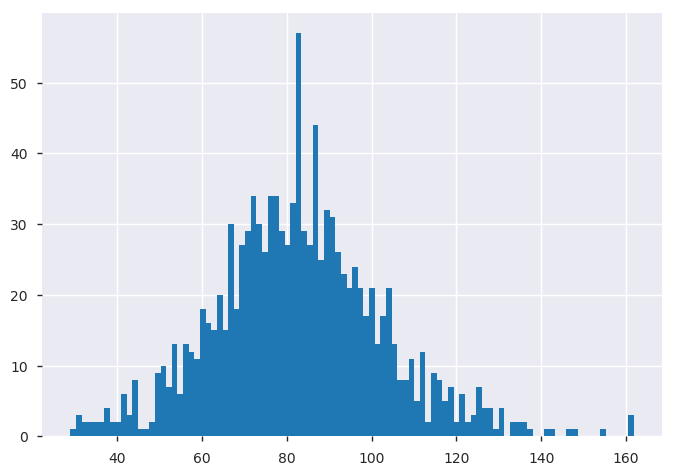

In [1000]:
merged1['Injury_Death_Rate'].hist(bins=100);

# Merging SDoH and Cancer data

In [1001]:
merged1.head()

,FIPS,State,County,Life_Expectancy,Age_Adjusted_Mortality,Child_Mortality_Rate,Infant_Mortality_Rate,pct_Frequent_Physical_Distress,pct_Frequent_Mental_Distress,pct_Diabetic,HIV_Prevalence_Rate,pct_Food_Insecure,pct_Limited_Access_to_healthy_foods,Drug_Overdose_Mortality_Rate,MV_Mortality_Rate,pct_Insufficient_Sleep,pct_Adult_Uninsured,pct_Child_Uninsured,Household_Income,pct_Homeowners,Population,pct_below_18,pct_65_and_over,pct_African_American,pct_American_Indian_Alaskan_Native,pct_Asian,pct_Native_Hawaiian_Other_Pacific_Islander,pct_Hispanic,pct_Non_Hispanic_White,Years_of_Potential_Life_Lost_Rate,pct_Fair_Poor,Physically_Unhealthy_Days,Mentally_Unhealthy_Days,pct_LBW,pct_Smokers,pct_Obese,Food_Environment_Index,pct_Physically_Inactive,pct_With_Access,pct_Excessive_Drinking,pct_Alcohol_Impaired,Chlamydia_Rate,Teen_Birth_Rate,pct_Uninsured,PCP_Rate,PCP_Ratio,Dentist_Rate,Dentist_Ratio,MHP_Rate,MHP_Ratio,Preventable_Hosp._Rate,pct_Screened,pct_Vaccinated,Graduation_Rate,pct_Some_College,pct_Unemployed,pct_Children_in_Poverty,80th_Percentile_Income,20th_Percentile_Income,Income_Ratio,Violent_Crime_Rate,Injury_Death_Rate,Average_Daily_PM2.5,Presence_of_violation,pct_Severe_Housing_Problems
0,13001,Georgia,Appling,74.553535,536.4,59.436970,7.636473,13.513213,13.631619,12.9,172.0,14.3,6.773041,18.51183,23.225027,36.040842,21.788136,8.102975,40862,71.859147,18521,24.793478,17.266886,18.595108,0.577723,0.788294,0.205173,10.258625,69.051347,10749.968790,20.860321,4.315623,4.167643,9.866512,20.200401,36.1,7.5,27.2,27.648607,14.686055,24.000000,536.5,66.978193,17.608928,43.412200,2304:1,16.19783,6174:1,37.794940,2646:1,7080.0,37.0,30.0,82.683983,38.746241,5.528561,33.5,78394,15377,5.098134,379.198267,80.101317,10.6,No,10.205580
1,13003,Georgia,Atkinson,73.462140,565.4,69.199726,7.636473,15.746570,14.973510,12.8,240.8,12.8,12.267063,18.51183,36.068220,38.392034,30.622304,10.314092,34821,74.074074,8342,27.307600,14.241189,16.099257,1.498442,0.911053,1.066890,24.814193,56.808919,10902.115783,26.766415,4.863178,4.439941,7.602957,23.552669,32.1,7.3,28.2,0.000000,14.423521,37.500000,428.7,78.017664,24.172885,47.606706,NaN,11.98753,8342:1,105.250941,NaN,7663.0,35.0,36.0,87.037037,35.566038,4.495192,36.5,68298,16159,4.226623,320.081387,105.957713,10.4,No,15.884477
2,13005,Georgia,Bacon,72.577063,608.3,69.199726,7.636473,13.213764,13.127666,12.4,468.6,13.2,5.476352,18.51183,31.690498,36.434163,23.108856,8.607511,38417,70.719479,11319,25.894514,15.434226,16.043820,0.353388,0.600760,0.167859,8.905380,72.877463,11414.503045,19.157643,4.331201,4.020762,9.456740,19.999158,33.0,7.8,28.9,61.094088,15.757069,23.529412,522.2,47.545419,18.625040,43.967640,2274:1,26.50411,3773:1,8.834700,11319:1,7038.0,36.0,32.0,84.671533,42.101740,4.537419,42.7,84407,15716,5.370769,320.081387,88.515942,10.4,No,10.126582
3,13007,Georgia,Baker,76.226226,512.5,69.199726,7.636473,11.841073,12.034979,16.5,296.9,16.5,30.546437,18.51183,21.635442,37.560492,18.965517,7.064364,37286,69.341408,3200,19.843750,21.937500,44.593750,0.468750,1.093750,0.062500,5.687500,47.312500,9457.189341,18.512541,3.903933,3.786131,13.551402,18.219631,32.5,5.0,27.4,5.824399,13.818968,60.000000,408.8,36.474164,16.065054,47.606706,NaN,0.00000,3200:0,31.250000,3200:1,7961.0,55.0,22.0,90.000000,49.513213,6.311475,40.0,79571,12956,6.141633,320.081387,68.212824,10.8,No,11.627907
4,13009,Georgia,Baldwin,75.244221,474.0,97.237316,9.987516,14.951144,14.317559,12.4,319.9,22.6,9.319845,18.51183,15.711363,38.618257,18.297424,5.704281,40358,55.137783,44906,19.175611,15.594798,42.199261,0.345165,1.719147,0.077941,2.280319,52.373848,9659.224156,23.503294,4.702728,4.250728,12.649628,24.107593,34.1,5.8,23.9,63.007437,13.976129,19.444444,635.7,17.809268,15.034754,57.593480,1736:1,40.08373,2495:1,133.612430,748:1,5451.0,40.0,40.0,88.813559,52.376673,5.944429,32.5,82716,13434,6.157213,689.414434,72.101540,11.4,Yes,20.025031


In [1002]:
cancer.head()

,State,County,CaseCount,Cases_AgeAdj_Rate,DeathCount,Population,Deaths_AgeAdj_Rate
0,Mississippi,Issaquena,25.0,277.6,NaN,6932,NaN
1,Mississippi,George,486.0,384.2,256.0,115705,213.3
2,Mississippi,Kemper,261.0,398.6,120.0,50999,185.5
3,Mississippi,Smith,406.0,395.5,195.0,81304,184.9
4,Mississippi,Choctaw,224.0,387.6,78.0,41763,133.4


In [1003]:
cancer = cancer.fillna('1')
#cancer.isnull().sum()

In [1004]:
cancer.County = cancer.County.str.replace(' Parish', '')

In [1009]:
cancer.County = cancer.County.str.replace('Alleghany Cnty and Clifton Forge Cty', 'Alleghany')
cancer.County = cancer.County.str.replace('Bedford City and', 'Bedford')
cancer.County = cancer.County.str.replace('Halifax  with South Boston City', 'Halifax')
print('_'+ cancer.loc[102,'County']+'_')

_Halifax_


In [1010]:
cancer[cancer['County'].str.contains('Halifax')].sort_values(by = 'County').head()
#print('_'+ cancer.loc[1097,'County']+'_')


,State,County,CaseCount,Cases_AgeAdj_Rate,DeathCount,Population,Deaths_AgeAdj_Rate
102,Virginia,Halifax,1061,402.7,474,177548,168.3
884,North Carolina,Halifax,1744,480.5,724,266667,192.8


In [1011]:
merged1[merged1['State'].str.contains('Virginia')].sort_values(by = 'County').head(100)
#print('_'+ cancer.loc[1097,'County']+'_')

,FIPS,State,County,Life_Expectancy,Age_Adjusted_Mortality,Child_Mortality_Rate,Infant_Mortality_Rate,pct_Frequent_Physical_Distress,pct_Frequent_Mental_Distress,pct_Diabetic,HIV_Prevalence_Rate,pct_Food_Insecure,pct_Limited_Access_to_healthy_foods,Drug_Overdose_Mortality_Rate,MV_Mortality_Rate,pct_Insufficient_Sleep,pct_Adult_Uninsured,pct_Child_Uninsured,Household_Income,pct_Homeowners,Population,pct_below_18,pct_65_and_over,pct_African_American,pct_American_Indian_Alaskan_Native,pct_Asian,pct_Native_Hawaiian_Other_Pacific_Islander,pct_Hispanic,pct_Non_Hispanic_White,Years_of_Potential_Life_Lost_Rate,pct_Fair_Poor,Physically_Unhealthy_Days,Mentally_Unhealthy_Days,pct_LBW,pct_Smokers,pct_Obese,Food_Environment_Index,pct_Physically_Inactive,pct_With_Access,pct_Excessive_Drinking,pct_Alcohol_Impaired,Chlamydia_Rate,Teen_Birth_Rate,pct_Uninsured,PCP_Rate,PCP_Ratio,Dentist_Rate,Dentist_Ratio,MHP_Rate,MHP_Ratio,Preventable_Hosp._Rate,pct_Screened,pct_Vaccinated,Graduation_Rate,pct_Some_College,pct_Unemployed,pct_Children_in_Poverty,80th_Percentile_Income,20th_Percentile_Income,Income_Ratio,Violent_Crime_Rate,Injury_Death_Rate,Average_Daily_PM2.5,Presence_of_violation,pct_Severe_Housing_Problems
601,51001,Virginia,Accomack,75.942711,444.9,65.912337,9.930121,12.342215,12.552715,15.2,346.300000,14.1,2.092269,11.171482,21.615920,36.750185,21.191910,8.608696,44038,69.973389,32545,20.758949,22.743893,28.074973,0.648333,0.743586,0.172069,9.076663,60.175142,10459.767289,20.009990,3.854329,3.831381,9.215263,16.488727,34.4,8.000000,29.0,36.898444,15.141610,37.142857,746.100000,34.351804,17.860554,48.562840,2059:1,46.090030,2170:1,95.252730,1050:1,4745.000000,44.000000,42.000000,89.7,48.127948,4.821921,28.0,86914,19188,4.529602,225.867989,82.000073,8.7,Yes,14.040115
602,51003,Virginia,Albemarle,83.131806,209.9,17.217038,7.636473,9.114640,10.264175,7.0,150.800000,8.9,3.655561,6.244478,8.897089,30.628450,12.163523,6.434293,77591,63.623641,107702,20.088763,17.783328,9.542998,0.402035,5.364803,0.093777,5.842974,76.777590,3795.755690,12.945211,3.085817,3.344249,6.287869,12.368072,21.6,8.800000,16.7,76.721229,19.091008,44.444444,260.200000,6.223818,10.600492,153.445990,652:1,101.205180,988:1,117.917960,848:1,2837.000000,49.000000,58.000000,94.7,75.825925,3.305948,8.8,145721,32561,4.475323,100.243721,54.000591,8.5,Yes,13.987904
696,51510,Virginia,Alexandria City,83.590830,201.0,53.741771,3.871913,9.634391,10.233929,7.1,672.300000,10.0,8.722949,9.161489,4.342007,31.746945,12.858231,6.705448,99959,43.074145,160035,18.037304,11.069454,22.446340,0.681726,6.661668,0.135595,16.640110,51.623707,3934.213585,13.051861,3.180005,3.249037,6.979135,13.718341,22.3,7.064987,13.9,100.000000,20.500984,33.333333,438.400000,25.069316,11.599412,67.389770,1484:1,81.857090,1222:1,290.561440,344:1,5185.000000,37.000000,46.000000,83.1,81.613226,2.869459,17.0,176429,42921,4.110552,186.367434,37.850064,9.7,Unk,15.400718
603,51005,Virginia,Alleghany,77.341088,424.2,69.199726,7.636473,11.371111,12.046874,12.6,146.200000,11.4,4.727222,21.554511,20.761870,33.947249,11.569393,4.758779,49655,76.099621,15122,19.025261,24.130406,4.602566,0.290967,0.290967,0.085967,1.534189,91.608253,8121.374968,16.412950,3.748033,3.781018,7.577375,16.478937,31.3,8.200000,26.9,100.000000,15.229774,27.777778,229.600000,28.843203,9.834789,51.298490,1949:1,26.451530,3781:1,33.064410,3024:1,8763.000000,45.000000,49.000000,91.1,52.765693,4.866998,20.7,93075,17013,5.470816,195.935910,82.934609,8.7,No,12.758112
604,51007,Virginia,Amelia,76.062888,447.7,69.199726,7.636473,10.038777,10.870821,13.5,127.900000,10.7,5.756433,18.511830,31.111111,34.908477,14.686404,7.684022,54979,83.592254,13020,20.844854,19.101382,20.937020,0.568356,0.591398,0.046083,2.987711,73.556068,9774.084751,15.193286,3.321222,3.542777,6.396588,15.925716,33.2,8.300000,25.8,8.502758,17.106033,45.000000,255.800000,19.362646,12.867079,15.488270,6457:1,30.721970,3255:1,53.763440,1860:1,4809.000000,41.000000,45.000000,94.2,57.727273,4.002562,14

In [1012]:
print('_'+ cancer.loc[1097,'County']+'_')

_Acadia_


In [1013]:
cancer['County'] = cancer['County'].str.strip()
cancer['State'] = cancer['State'].str.strip()
merged1['County'] = merged1['County'].str.strip()
merged1['State'] = merged1['State'].str.strip()

In [1015]:
cancer[cancer['County'].str.contains('Halifax')].sort_values(by = 'County').head()

,State,County,CaseCount,Cases_AgeAdj_Rate,DeathCount,Population,Deaths_AgeAdj_Rate
102,Virginia,Halifax,1061,402.7,474,177548,168.3
884,North Carolina,Halifax,1744,480.5,724,266667,192.8


In [1016]:
merged1[merged1['County'].str.contains('Halifax')].sort_values(by = 'County').head()
#merged1.dtypes
#print('_'+ merged1.loc[603,'State']+'_')

,FIPS,State,County,Life_Expectancy,Age_Adjusted_Mortality,Child_Mortality_Rate,Infant_Mortality_Rate,pct_Frequent_Physical_Distress,pct_Frequent_Mental_Distress,pct_Diabetic,HIV_Prevalence_Rate,pct_Food_Insecure,pct_Limited_Access_to_healthy_foods,Drug_Overdose_Mortality_Rate,MV_Mortality_Rate,pct_Insufficient_Sleep,pct_Adult_Uninsured,pct_Child_Uninsured,Household_Income,pct_Homeowners,Population,pct_below_18,pct_65_and_over,pct_African_American,pct_American_Indian_Alaskan_Native,pct_Asian,pct_Native_Hawaiian_Other_Pacific_Islander,pct_Hispanic,pct_Non_Hispanic_White,Years_of_Potential_Life_Lost_Rate,pct_Fair_Poor,Physically_Unhealthy_Days,Mentally_Unhealthy_Days,pct_LBW,pct_Smokers,pct_Obese,Food_Environment_Index,pct_Physically_Inactive,pct_With_Access,pct_Excessive_Drinking,pct_Alcohol_Impaired,Chlamydia_Rate,Teen_Birth_Rate,pct_Uninsured,PCP_Rate,PCP_Ratio,Dentist_Rate,Dentist_Ratio,MHP_Rate,MHP_Ratio,Preventable_Hosp._Rate,pct_Screened,pct_Vaccinated,Graduation_Rate,pct_Some_College,pct_Unemployed,pct_Children_in_Poverty,80th_Percentile_Income,20th_Percentile_Income,Income_Ratio,Violent_Crime_Rate,Injury_Death_Rate,Average_Daily_PM2.5,Presence_of_violation,pct_Severe_Housing_Problems
641,51083,Virginia,Halifax,75.847564,471.3,79.562751,8.016032,12.872161,12.522374,15.8,252.8,16.4,11.195811,18.511830,22.655005,34.734908,14.286452,5.014268,42552,72.564612,34563,20.657929,23.629315,35.931487,0.370338,0.593120,0.023146,2.112085,59.841449,10501.121741,21.151241,4.248728,3.756246,10.314961,19.141244,32.2,6.7,28.3,45.266411,14.096792,26.829268,429.9,38.808418,11.791107,40.00914,2499:1,43.39901,2304:1,86.79802,1152:1,4684.0,42.0,45.0,91.300000,54.843641,5.241583,24.4,79112,15937,4.964046,207.252405,82.153799,9.9,No,12.727273
857,37083,North Carolina,Halifax,75.463463,494.9,79.962684,10.997251,14.795323,14.851700,16.2,408.4,24.7,9.386242,18.645681,20.803277,36.607083,17.165397,4.339805,34027,63.130099,51310,21.309686,20.113038,52.948743,4.044046,0.851686,0.070162,2.954590,38.351199,10270.342857,24.327877,4.543536,4.724912,11.782178,22.431798,38.0,5.4,30.5,56.327366,13.304899,36.363636,703.4,45.528017,13.689586,52.15779,1917:1,33.13194,3018:1,130.57883,766:1,7141.0,44.0,47.0,75.473477,46.567863,7.376930,40.2,73426,12911,5.687089,461.368957,90.091810,9.8,Yes,19.748486


In [1017]:
master_df = pd.merge(merged1, cancer, on = ['County', 'State'], how='left')

In [1018]:
master_df.shape

(1142, 70)

In [1019]:
master_df.head(1)

,FIPS,State,County,Life_Expectancy,Age_Adjusted_Mortality,Child_Mortality_Rate,Infant_Mortality_Rate,pct_Frequent_Physical_Distress,pct_Frequent_Mental_Distress,pct_Diabetic,HIV_Prevalence_Rate,pct_Food_Insecure,pct_Limited_Access_to_healthy_foods,Drug_Overdose_Mortality_Rate,MV_Mortality_Rate,pct_Insufficient_Sleep,pct_Adult_Uninsured,pct_Child_Uninsured,Household_Income,pct_Homeowners,Population_x,pct_below_18,pct_65_and_over,pct_African_American,pct_American_Indian_Alaskan_Native,pct_Asian,pct_Native_Hawaiian_Other_Pacific_Islander,pct_Hispanic,pct_Non_Hispanic_White,Years_of_Potential_Life_Lost_Rate,pct_Fair_Poor,Physically_Unhealthy_Days,Mentally_Unhealthy_Days,pct_LBW,pct_Smokers,pct_Obese,Food_Environment_Index,pct_Physically_Inactive,pct_With_Access,pct_Excessive_Drinking,pct_Alcohol_Impaired,Chlamydia_Rate,Teen_Birth_Rate,pct_Uninsured,PCP_Rate,PCP_Ratio,Dentist_Rate,Dentist_Ratio,MHP_Rate,MHP_Ratio,Preventable_Hosp._Rate,pct_Screened,pct_Vaccinated,Graduation_Rate,pct_Some_College,pct_Unemployed,pct_Children_in_Poverty,80th_Percentile_Income,20th_Percentile_Income,Income_Ratio,Violent_Crime_Rate,Injury_Death_Rate,Average_Daily_PM2.5,Presence_of_violation,pct_Severe_Housing_Problems,CaseCount,Cases_AgeAdj_Rate,DeathCount,Population_y,Deaths_AgeAdj_Rate
0,13001,Georgia,Appling,74.553535,536.4,59.43697,7.636473,13.513213,13.631619,12.9,172.0,14.3,6.773041,18.51183,23.225027,36.040842,21.788136,8.102975,40862,71.859147,18521,24.793478,17.266886,18.595108,0.577723,0.788294,0.205173,10.258625,69.051347,10749.96879,20.860321,4.315623,4.167643,9.866512,20.200401,36.1,7.5,27.2,27.648607,14.686055,24.0,536.5,66.978193,17.608928,43.4122,2304:1,16.19783,6174:1,37.79494,2646:1,7080.0,37.0,30.0,82.683983,38.746241,5.528561,33.5,78394,15377,5.098134,379.198267,80.101317,10.6,No,10.20558,443,402.5,191,92074,179.5


In [1020]:
master_df.loc[master_df.Population_y.isnull()]

,FIPS,State,County,Life_Expectancy,Age_Adjusted_Mortality,Child_Mortality_Rate,Infant_Mortality_Rate,pct_Frequent_Physical_Distress,pct_Frequent_Mental_Distress,pct_Diabetic,HIV_Prevalence_Rate,pct_Food_Insecure,pct_Limited_Access_to_healthy_foods,Drug_Overdose_Mortality_Rate,MV_Mortality_Rate,pct_Insufficient_Sleep,pct_Adult_Uninsured,pct_Child_Uninsured,Household_Income,pct_Homeowners,Population_x,pct_below_18,pct_65_and_over,pct_African_American,pct_American_Indian_Alaskan_Native,pct_Asian,pct_Native_Hawaiian_Other_Pacific_Islander,pct_Hispanic,pct_Non_Hispanic_White,Years_of_Potential_Life_Lost_Rate,pct_Fair_Poor,Physically_Unhealthy_Days,Mentally_Unhealthy_Days,pct_LBW,pct_Smokers,pct_Obese,Food_Environment_Index,pct_Physically_Inactive,pct_With_Access,pct_Excessive_Drinking,pct_Alcohol_Impaired,Chlamydia_Rate,Teen_Birth_Rate,pct_Uninsured,PCP_Rate,PCP_Ratio,Dentist_Rate,Dentist_Ratio,MHP_Rate,MHP_Ratio,Preventable_Hosp._Rate,pct_Screened,pct_Vaccinated,Graduation_Rate,pct_Some_College,pct_Unemployed,pct_Children_in_Poverty,80th_Percentile_Income,20th_Percentile_Income,Income_Ratio,Violent_Crime_Rate,Injury_Death_Rate,Average_Daily_PM2.5,Presence_of_violation,pct_Severe_Housing_Problems,CaseCount,Cases_AgeAdj_Rate,DeathCount,Population_y,Deaths_AgeAdj_Rate


In [1022]:
#master_df.isnull().sum()

In cancer registry, any number below 16 is suppressed as it is not cosidered as significant; therefore, I am filling it with '1'.

In [928]:
master_df.dtypes

FIPS                                           object
State                                          object
County                                         object
Life_Expectancy                               float64
Age_Adjusted_Mortality                        float64
Child_Mortality_Rate                          float64
Infant_Mortality_Rate                         float64
pct_Frequent_Physical_Distress                float64
pct_Frequent_Mental_Distress                  float64
pct_Diabetic                                  float64
HIV_Prevalence_Rate                           float64
pct_Food_Insecure                             float64
pct_Limited_Access_to_healthy_foods           float64
Drug_Overdose_Mortality_Rate                  float64
MV_Mortality_Rate                             float64
pct_Insufficient_Sleep                        float64
pct_Adult_Uninsured                           float64
pct_Child_Uninsured                           float64
Household_Income            